In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Create Soundfield Plots

In [12]:
filenames = ["axial_+.dat","axial_-.dat"]

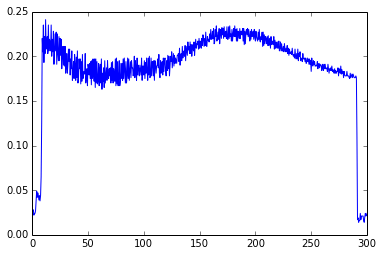

In [15]:
for name in filenames:
    data = pd.read_csv(name, decimal=',', delimiter='\t')
    pos = data["Position[mm]"][:-1]
    amp = data["Voltage[V]"][:-1]
    plt.close()
    plt.plot(pos,amp)
    plt.savefig("%s.pdf"%name)
    

## Lateral Soundfieldplot
Dieses bringt es nicht wirklich da  

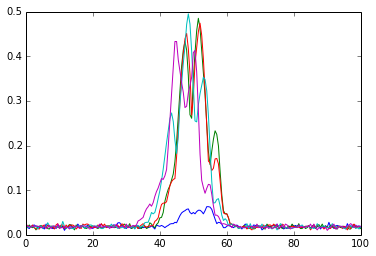

In [18]:

for i in range(5):
    data_plus = pd.read_csv("lateral_%i+.dat"%i, delimiter='\t', decimal=',')
    data_minus = pd.read_csv("lateral_%i-.dat"%i, delimiter='\t', decimal=',')
    amp_plus = data_plus["Voltage[V]"][:-1]
    amp_minus = data_minus["
                           Voltage[V]"][:-1]
    pos = data_plus["Position[mm]"][:-1]
    plt.plot(pos , amp_plus)
plt.savefig("lateral_+.pdf")